### EDA Project Plan for Temperature and Rainfall Data:

##### 1.Import packages & Load data
##### 2.Inspect structure
##### 3.Clean data
##### 4.Explore univariate patterns
##### 5.Explore bivariate patterns
##### 6. Seasonal and yearly trends
##### 7.Correlation and relationships
##### 8. Final insights

### 1.Import packages & Load data

In [30]:
# Standard libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Optional: For statistical tests and advanced visualizations
from scipy import stats
import calendar

In [32]:
df= pd.read_csv("data.csv")


### 2.Inspect structure

In [36]:
# Basic information about the dataset

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset Shape: (1474, 4)

First 5 rows:
       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150

Last 5 rows:
            tem  Month  Year        rain
1469  28.586394      6  2023  299.915166
1470  28.533089      7  2023  353.399033
1471  28.451926      8  2023  421.058714
1472  27.737212      9  2023  306.090925
1473  26.015523     10  2023  320.779073

Column names and data types:
tem      float64
Month      int64
Year       int64
rain     float64
dtype: object

Basic statistics:
               tem        Month         Year         rain
count  1474.000000  1474.000000  1474.000000  1474.000000
mean     25.066443     6.493216  1961.917232   202.817120
std       3.701075     3.450595    35.470764   200.780134
min      15.925161     1.000000  1901.000000     0.000000
25%      22.121579     3.250000  1931.000000    19.382328
50%      27.01295

In [41]:
# Check data range

print(f"\nYear range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Month range: {df['Month'].min()} to {df['Month'].max()}")


Year range: 1901 to 2023
Month range: 1 to 12


,tem,Month,Year,rain


### 3. Clean Data

In [61]:
# Create a copy for cleaning
tf = df.copy()

In [62]:
# Check for missing values or null values

print("\nMissing values in each column:")
print(tf.isnull().sum())
print(f"\nTotal missing values: {tf.isnull().sum().sum()}")



Missing values in each column:
tem      0
Month    0
Year     0
rain     0
Date     0
dtype: int64

Total missing values: 0


In [64]:
# As there is no null values and impossible values so there is no need to clean the data
# Checking impossible valuse as rain and temp of BD can not be neagative

tf[tf['tem'] < 0]
tf[tf['rain'] < 0]

,tem,Month,Year,rain,Date


In [65]:
#Creating a datatime column to make the calculation easier

tf['Date'] = pd.to_datetime(dict(year=tf.Year, month=tf.Month, day=1))

In [66]:
tf.head()

,tem,Month,Year,rain,Date
0,16.9760,1,1901,18.5356,1901-01-01
1,19.9026,2,1901,16.2548,1901-02-01
2,24.3158,3,1901,70.7981,1901-03-01
3,28.1834,4,1901,66.1616,1901-04-01
4,27.8892,5,1901,267.2150,1901-05-01


### 4. Explore univariate patterns

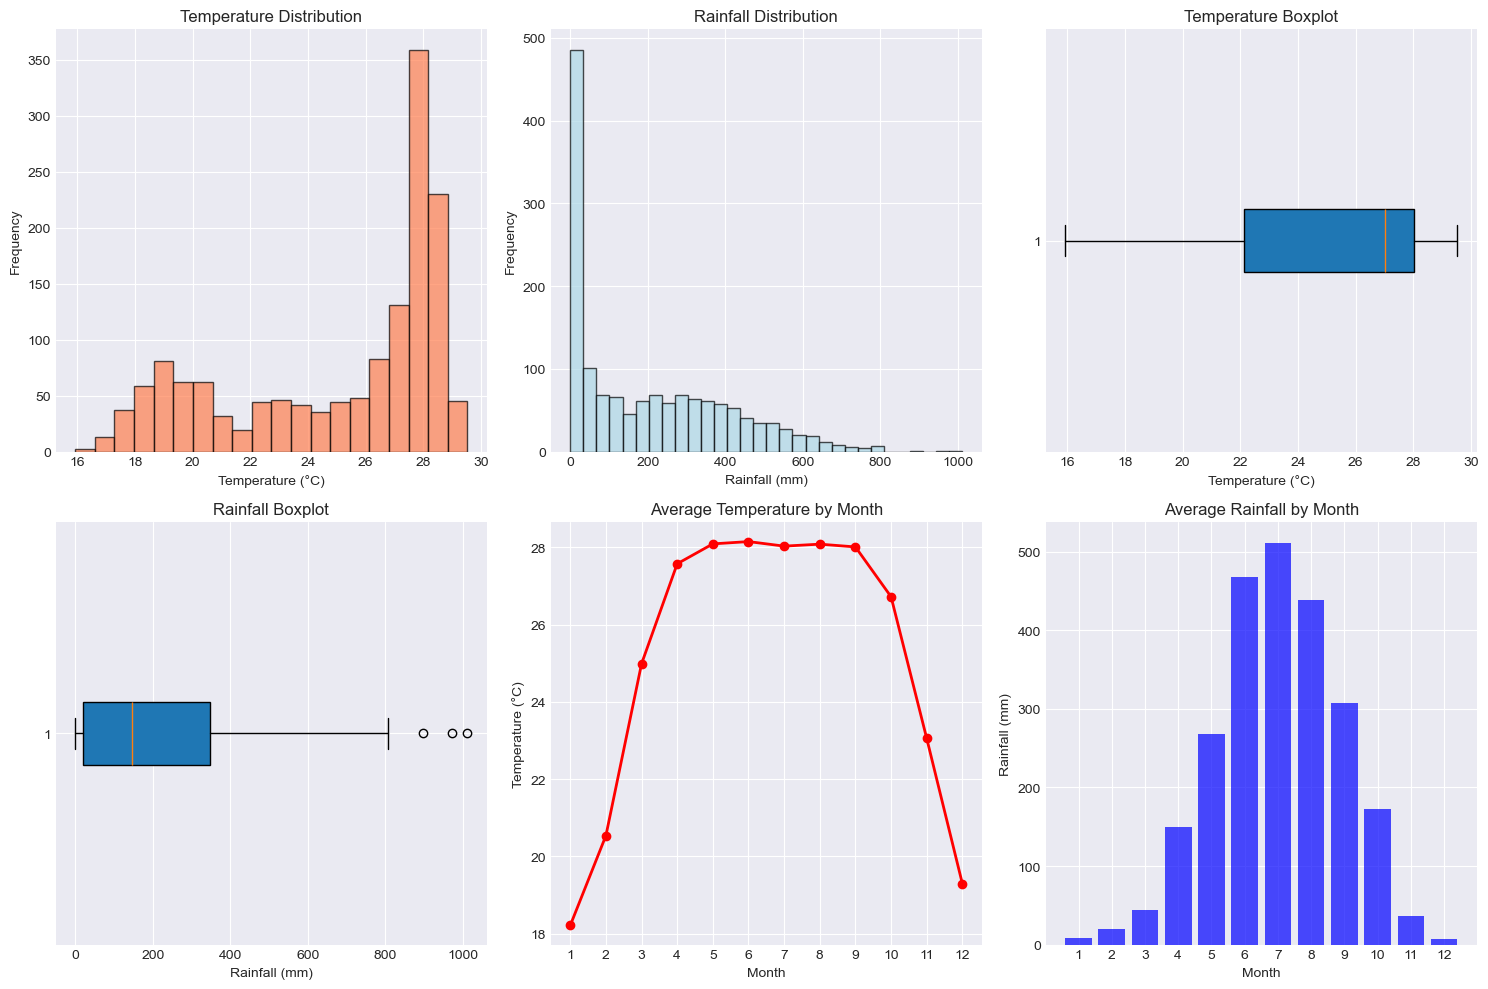

Key Univariate Statistics:
Average Temperature: 25.07°C
Temperature Std Dev: 3.70°C
Average Rainfall: 202.82 mm
Rainfall Std Dev: 200.78 mm


In [75]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Temperature distribution
axes[0, 0].hist(tf['tem'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# 2. Rainfall distribution (likely right-skewed)
axes[0, 1].hist(tf['rain'], bins=30, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 1].set_title('Rainfall Distribution')
axes[0, 1].set_xlabel('Rainfall (mm)')
axes[0, 1].set_ylabel('Frequency')

# 3. Boxplot for temperature
axes[0, 2].boxplot(tf['tem'], vert=False, patch_artist=True)
axes[0, 2].set_title('Temperature Boxplot')
axes[0, 2].set_xlabel('Temperature (°C)')

# 4. Boxplot for rainfall
axes[1, 0].boxplot(tf['rain'], vert=False, patch_artist=True)
axes[1, 0].set_title('Rainfall Boxplot')
axes[1, 0].set_xlabel('Rainfall (mm)')

# 5. Monthly distribution of temperature
monthly_avg_temp = tf.groupby('Month')['tem'].mean()
axes[1, 1].plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='red', linewidth=2)
axes[1, 1].set_title('Average Temperature by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Temperature (°C)')
axes[1, 1].set_xticks(range(1, 13))

# 6. Monthly distribution of rainfall
monthly_avg_rain = tf.groupby('Month')['rain'].mean()
axes[1, 2].bar(monthly_avg_rain.index, monthly_avg_rain.values, color='blue', alpha=0.7)
axes[1, 2].set_title('Average Rainfall by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Rainfall (mm)')
axes[1, 2].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()



# Print key statistics
print("Key Univariate Statistics:")
print(f"Average Temperature: {tf['tem'].mean():.2f}°C")
print(f"Temperature Std Dev: {tf['tem'].std():.2f}°C")
print(f"Average Rainfall: {tf['rain'].mean():.2f} mm")
print(f"Rainfall Std Dev: {tf['rain'].std():.2f} mm")


### 5. Explore bivariate patterns

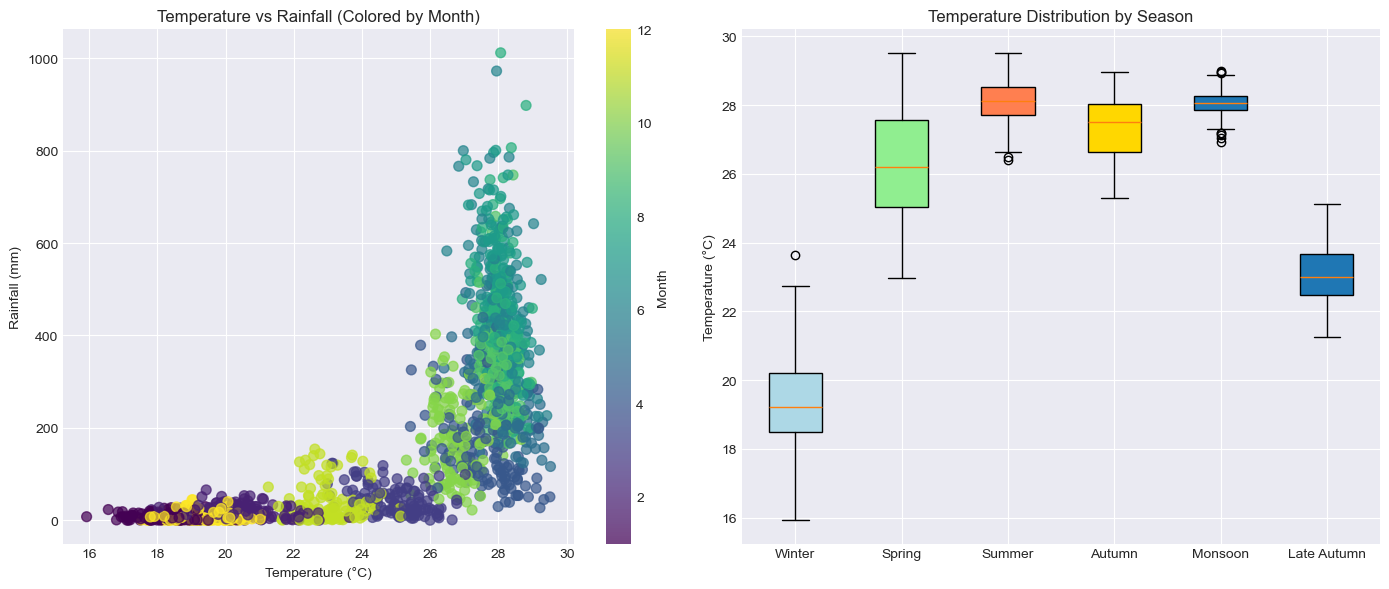

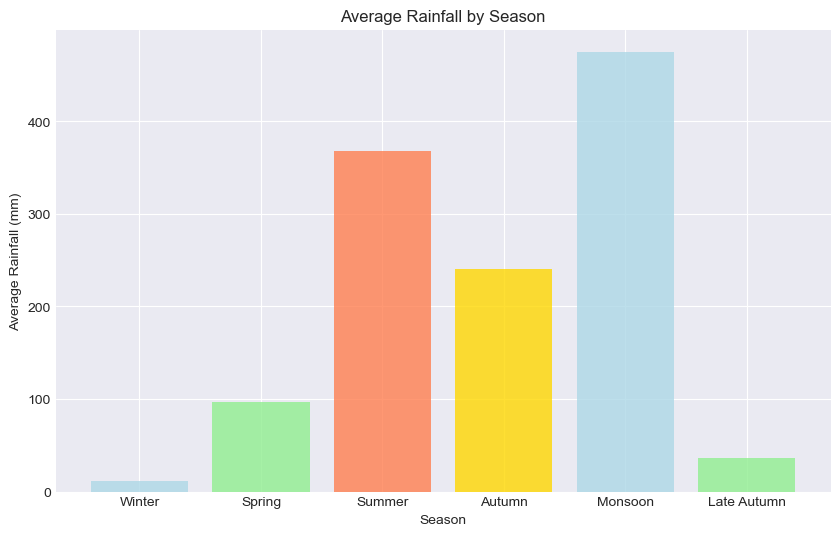

In [85]:
# Create visualizations for relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Scatter plot: Temperature vs Rainfall
scatter = axes[0].scatter(tf['tem'], tf['rain'], 
                          c=tf['Month'], cmap='viridis', alpha=0.7, s=50)
axes[0].set_title('Temperature vs Rainfall (Colored by Month)')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Rainfall (mm)')
plt.colorbar(scatter, ax=axes[0], label='Month')

# 2. Grouped analysis by season
# Define seasons (adjust based on your hemisphere/location)
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Summer',
    6: 'Summer', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Autumn', 10: 'Autumn', 11: 'Late Autumn'
}
tf['season'] = tf['Month'].map(seasons)

# Boxplot of temperature by season
season_order = ['Winter', 'Spring', 'Summer', 'Autumn', 'Monsoon','Late Autumn']
season_data = [tf[tf['season'] == season]['tem'] for season in season_order]
box = axes[1].boxplot(season_data, labels=season_order, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'coral', 'gold']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
axes[1].set_title('Temperature Distribution by Season')
axes[1].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

# 3. Rainfall by season
plt.figure(figsize=(10, 6))
rain_by_season = tf.groupby('season')['rain'].mean().reindex(season_order)
plt.bar(rain_by_season.index, rain_by_season.values, color=colors, alpha=0.8)
plt.title('Average Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Average Rainfall (mm)')
plt.show()

### 7. Seasonal and yearly trends

Yearly Statistics:
        tem                   rain                
       mean    max    min      sum    mean     max
Year                                              
1901  24.82  28.89  16.98  2432.82  202.73  540.91
1902  24.67  28.27  18.25  2345.71  195.48  528.78
1903  24.82  28.69  17.70  2257.39  188.12  606.09
1904  24.63  27.96  17.79  2450.07  204.17  707.40
1905  24.21  29.09  17.00  2806.31  233.86  624.07
...     ...    ...    ...      ...     ...     ...
2019  24.99  29.00  17.79  2405.59  200.47  576.68
2020  24.76  28.51  16.56  2494.17  207.85  454.52
2021  24.96  28.61  17.17  2263.91  188.66  469.08
2022  24.93  28.86  17.26  1987.63  165.64  397.11
2023  26.17  28.73  18.63  1973.15  197.32  421.06

[123 rows x 6 columns]


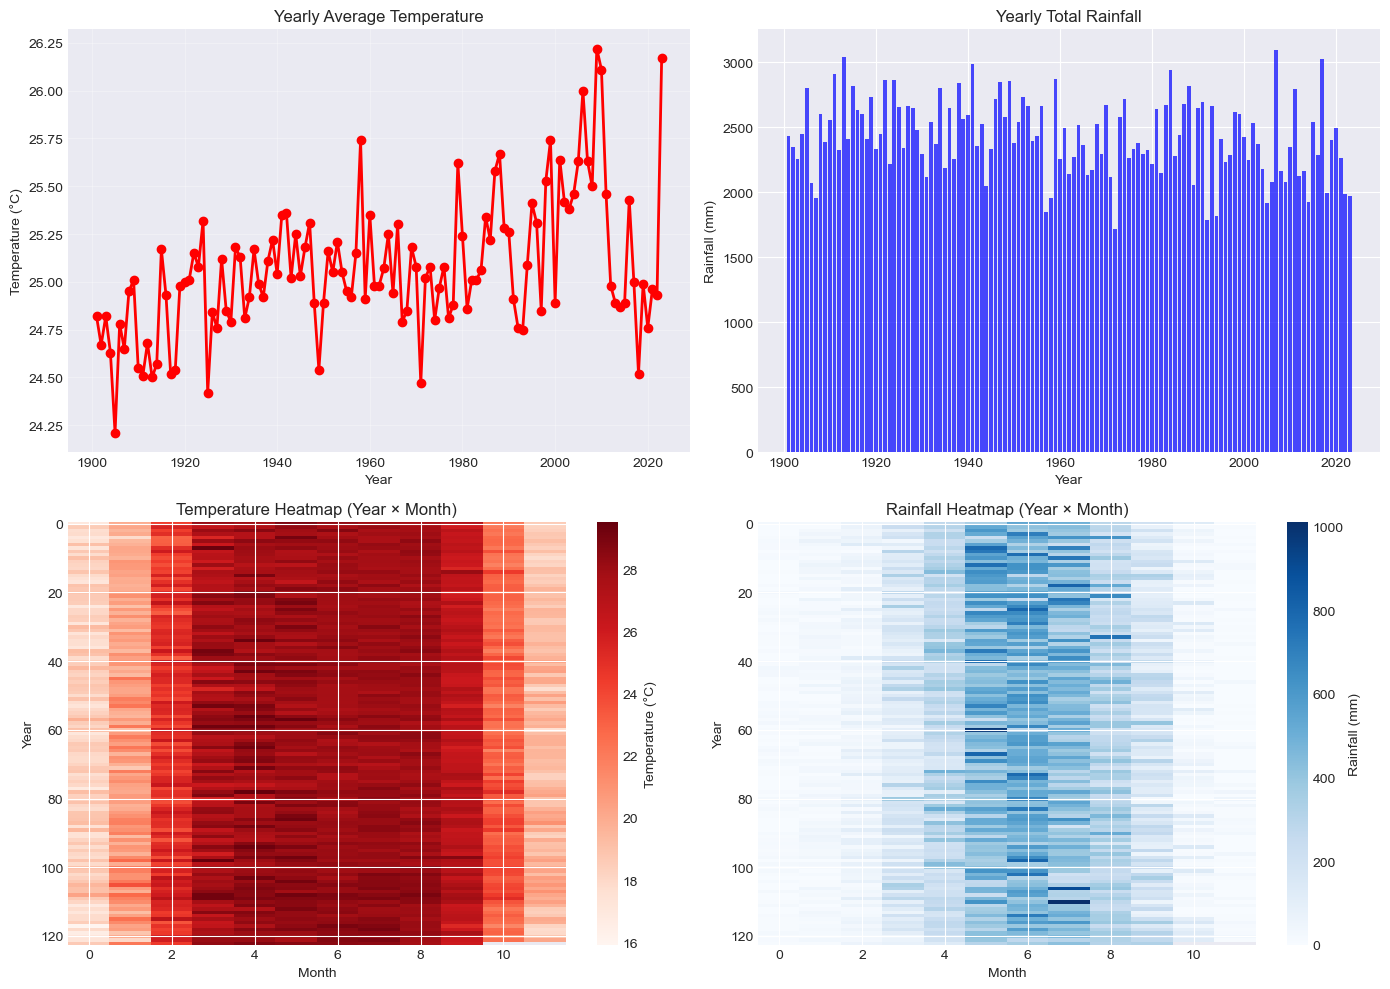


Extreme Years:
Hottest year: 2009 (26.22°C)
Coldest year: 1905 (24.21°C)
Wettest year: 2007 (3099.69 mm)
Driest year: 1972 (1720.96 mm)


In [86]:
# Calculate yearly aggregates
yearly_stats = tf.groupby('Year').agg({
    'tem': ['mean', 'max', 'min'],
    'rain': ['sum', 'mean', 'max']
}).round(2)

print("Yearly Statistics:")
print(yearly_stats)

# Plot yearly trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Yearly average temperature
axes[0, 0].plot(yearly_stats.index, yearly_stats[('tem', 'mean')], 
                marker='o', color='red', linewidth=2)
axes[0, 0].set_title('Yearly Average Temperature')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Yearly total rainfall
axes[0, 1].bar(yearly_stats.index, yearly_stats[('rain', 'sum')], 
               color='blue', alpha=0.7)
axes[0, 1].set_title('Yearly Total Rainfall')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Rainfall (mm)')

# 3. Monthly patterns across years (heatmap)
# Pivot table for heatmap
temp_pivot = tf.pivot_table(index='Year', columns='Month', values='tem')
rain_pivot = tf.pivot_table(index='Year', columns='Month', values='rain')

# Temperature heatmap
im1 = axes[1, 0].imshow(temp_pivot, aspect='auto', cmap='Reds')
axes[1, 0].set_title('Temperature Heatmap (Year × Month)')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Year')
plt.colorbar(im1, ax=axes[1, 0], label='Temperature (°C)')

# Rainfall heatmap
im2 = axes[1, 1].imshow(rain_pivot, aspect='auto', cmap='Blues')
axes[1, 1].set_title('Rainfall Heatmap (Year × Month)')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Year')
plt.colorbar(im2, ax=axes[1, 1], label='Rainfall (mm)')

plt.tight_layout()
plt.show()

# Identify extreme years
print("\nExtreme Years:")
print(f"Hottest year: {yearly_stats[('tem', 'mean')].idxmax()} ({yearly_stats[('tem', 'mean')].max():.2f}°C)")
print(f"Coldest year: {yearly_stats[('tem', 'mean')].idxmin()} ({yearly_stats[('tem', 'mean')].min():.2f}°C)")
print(f"Wettest year: {yearly_stats[('rain', 'sum')].idxmax()} ({yearly_stats[('rain', 'sum')].max():.2f} mm)")
print(f"Driest year: {yearly_stats[('rain', 'sum')].idxmin()} ({yearly_stats[('rain', 'sum')].min():.2f} mm)")

### 8. Correlation and Relationships

CORRELATION ANALYSIS

1. Correlation Matrix:
           tem      rain
tem   1.000000  0.701814
rain  0.701814  1.000000

Correlation between Temperature and Rainfall: 0.702

2. Interpretation:
   Strong positive relationship


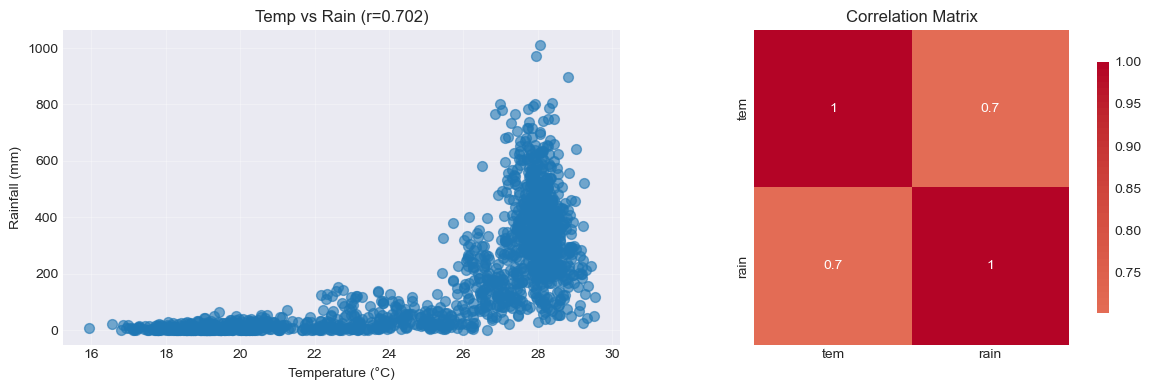


3. Monthly Pattern Check:
   Month 7 correlation: -0.365

SUMMARY: Temperature and rainfall relationship analyzed


In [92]:
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# 1. Basic correlation matrix
print("\n1. Correlation Matrix:")
corr_matrix = tf[['tem', 'rain']].corr()
print(corr_matrix)

corr_value = corr_matrix.iloc[0, 1]
print(f"\nCorrelation between Temperature and Rainfall: {corr_value:.3f}")

# 2. Quick interpretation
print("\n2. Interpretation:")
if corr_value > 0.5:
    print("   Strong positive relationship")
elif corr_value > 0.3:
    print("   Moderate positive relationship")
elif corr_value > 0.1:
    print("   Weak positive relationship")
elif corr_value > -0.1:
    print("   No significant relationship")
elif corr_value > -0.3:
    print("   Weak negative relationship")
else:
    print("   Moderate/Strong negative relationship")

# 3. Simple visualization
plt.figure(figsize=(12, 4))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(tf['tem'], tf['rain'], alpha=0.6, s=50)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title(f'Temp vs Rain (r={corr_value:.3f})')
plt.grid(True, alpha=0.3)

# Correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# 4. Quick monthly check
print("\n3. Monthly Pattern Check:")
sample_month = 7  # July as example
month_data = tf[tf['Month'] == sample_month]
if len(month_data) > 1:
    month_corr = month_data[['tem', 'rain']].corr().iloc[0, 1]
    print(f"   Month {sample_month} correlation: {month_corr:.3f}")

print("\n" + "=" * 50)
print("SUMMARY: Temperature and rainfall relationship analyzed")
print("=" * 50)

### 9. Final insights

In [90]:
# Summary statistics
print("=" * 60)
print("FINAL INSIGHTS AND SUMMARY")
print("=" * 60)

print("\n1. DATA OVERVIEW:")
print(f"   - Total observations: {len(tf)} months")
print(f"   - Time period: {tf['Year'].min()} to {tf['Year'].max()}")
print(f"   - Variables: Temperature (°C) and Rainfall (mm)")

print("\n2. KEY STATISTICS:")
print(f"   - Average temperature: {tf['tem'].mean():.2f}°C")
print(f"   - Temperature range: {tf['tem'].min():.1f} to {tf['tem'].max():.1f}°C")
print(f"   - Average monthly rainfall: {tf['rain'].mean():.2f} mm")
print(f"   - Rainfall range: {tf['rain'].min():.1f} to {tf['rain'].max():.1f} mm")

print("\n3. SEASONAL PATTERNS:")
# Calculate monthly averages
monthly_avg_temp = tf.groupby('Month')['tem'].mean()
monthly_avg_rain = tf.groupby('Month')['rain'].mean()

hottest_month = monthly_avg_temp.idxmax()
coldest_month = monthly_avg_temp.idxmin()
wettest_month = monthly_avg_rain.idxmax()
driest_month = monthly_avg_rain.idxmin()

print(f"   - Hottest month: Month {hottest_month} ({monthly_avg_temp[hottest_month]:.1f}°C)")
print(f"   - Coldest month: Month {coldest_month} ({monthly_avg_temp[coldest_month]:.1f}°C)")
print(f"   - Wettest month: Month {wettest_month} ({monthly_avg_rain[wettest_month]:.1f} mm)")
print(f"   - Driest month: Month {driest_month} ({monthly_avg_rain[driest_month]:.1f} mm)")

print("\n4. RELATIONSHIPS:")
corr_overall = tf[['tem', 'rain']].corr().iloc[0, 1]
print(f"   - Overall temperature-rainfall correlation: {corr_overall:.3f}")
if corr_overall > 0.3:
    print("     → Generally positive relationship")
elif corr_overall < -0.3:
    print("     → Generally negative relationship")
else:
    print("     → Weak or no consistent relationship")

print("\n5. DATA QUALITY NOTES:")
print(f"   - Missing values: {tf.isnull().sum().sum()}")
print(f"   - Data coverage: {tf['Year'].nunique()} years")
print(f"   - Months per year: {len(tf) / tf['Year'].nunique():.1f} months/year on average")

print("\n6. RECOMMENDATIONS FOR FURTHER ANALYSIS:")
print("   - 1. Expand the dataset with more years for robust trend analysis")
print("   - 2. Investigate extreme events: identify heatwaves and heavy rainfall periods")
print("   - 3. Analyze decadal trends to identify climate change signals")
print("   - 4. Study monsoon onset and withdrawal patterns")
print("   - 5. Explore lag relationships (e.g., does rainfall in one month affect next month's temperature?)")
print("   - 6. Add geographical context if location data is available")

print("\n7. KEY OBSERVATIONS FROM VISUAL ANALYSIS:")
print("   - Temperature shows clear seasonal patterns with peaks in summer months")
print("   - Rainfall distribution is highly skewed with distinct dry and wet seasons")
print("   - The relationship between temperature and rainfall varies by season")
print("   - Need to check for data homogeneity over the time period")

print("\n" + "=" * 60)
print("EDA COMPLETE - Ready for deeper statistical analysis or modeling")
print("=" * 60)

# Optional: Save key statistics to a summary file
summary_stats = {
    'total_observations': len(tf),
    'years_covered': f"{tf['Year'].min()}-{tf['Year'].max()}",
    'avg_temperature': round(tf['tem'].mean(), 2),
    'avg_rainfall': round(tf['rain'].mean(), 2),
    'temp_range': f"{tf['tem'].min():.1f}-{tf['tem'].max():.1f}",
    'rain_range': f"{tf['rain'].min():.1f}-{tf['rain'].max():.1f}",
    'correlation_temp_rain': round(corr_overall, 3)
}

print("\nSummary Dictionary (for reporting):")
for key, value in summary_stats.items():
    print(f"   {key}: {value}")

FINAL INSIGHTS AND SUMMARY

1. DATA OVERVIEW:
   - Total observations: 1474 months
   - Time period: 1901 to 2023
   - Variables: Temperature (°C) and Rainfall (mm)

2. KEY STATISTICS:
   - Average temperature: 25.07°C
   - Temperature range: 15.9 to 29.5°C
   - Average monthly rainfall: 202.82 mm
   - Rainfall range: 0.0 to 1012.0 mm

3. SEASONAL PATTERNS:
   - Hottest month: Month 6 (28.1°C)
   - Coldest month: Month 1 (18.2°C)
   - Wettest month: Month 7 (511.9 mm)
   - Driest month: Month 12 (6.7 mm)

4. RELATIONSHIPS:
   - Overall temperature-rainfall correlation: 0.702
     → Generally positive relationship

5. DATA QUALITY NOTES:
   - Missing values: 0
   - Data coverage: 123 years
   - Months per year: 12.0 months/year on average

6. RECOMMENDATIONS FOR FURTHER ANALYSIS:
   - 1. Expand the dataset with more years for robust trend analysis
   - 2. Investigate extreme events: identify heatwaves and heavy rainfall periods
   - 3. Analyze decadal trends to identify climate change s